\begin{equation}
    \begin{cases}
        8.3x_1 + 8.2x_2 = 134\\
        - 10.2x_1 + 15.2x_2 = 102\\
        14.5x_1 - 7.3x_2 = 141
    \end{cases}\,
\end{equation}

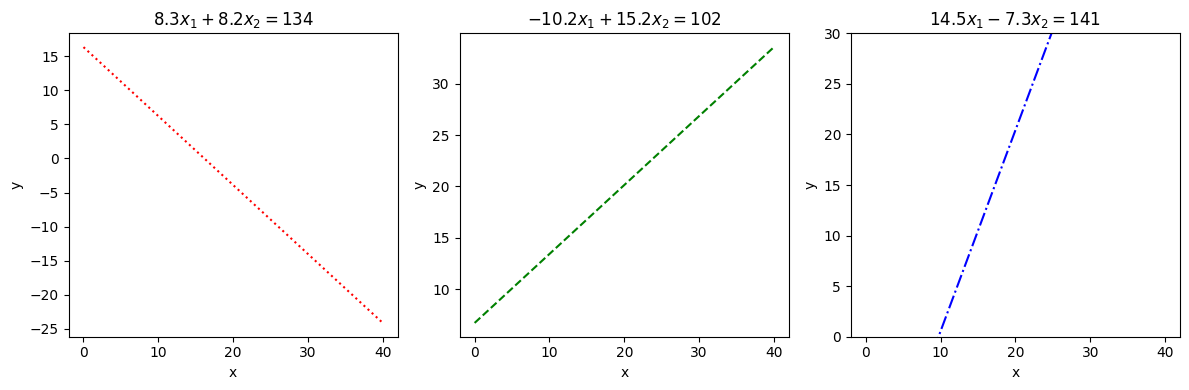

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

Path("").mkdir(parents=True, exist_ok=True)

def line1(x):
    return (134 - 8.3*x) / 8.2

def line2(x):
    return (102 + 10.2*x) / 15.2

def line3(x):
    return (141 - 14.5*x) / (-7.3)

x_values = np.linspace(0, 40, 100)

plt.figure(figsize=(12, 4))  

plt.subplot(1, 3, 1)  
plt.plot(x_values, line1(x_values), color='red', linestyle='dotted')
plt.title("$8.3x_1 + 8.2x_2 = 134$")
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 3, 2) 
plt.plot(x_values, line2(x_values), color='green', linestyle='dashed')
plt.title("$-10.2x_1 + 15.2x_2 = 102$")
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 3, 3) 
plt.plot(x_values, line3(x_values), color='blue', linestyle='dashdot')
plt.title("$14.5x_1 - 7.3x_2 = 141$")
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0, 30) 

plt.tight_layout()
plt.savefig("1.jpg", bbox_inches="tight")
plt.savefig("1.png", bbox_inches="tight")
plt.savefig("1.svg", bbox_inches="tight")
plt.show()


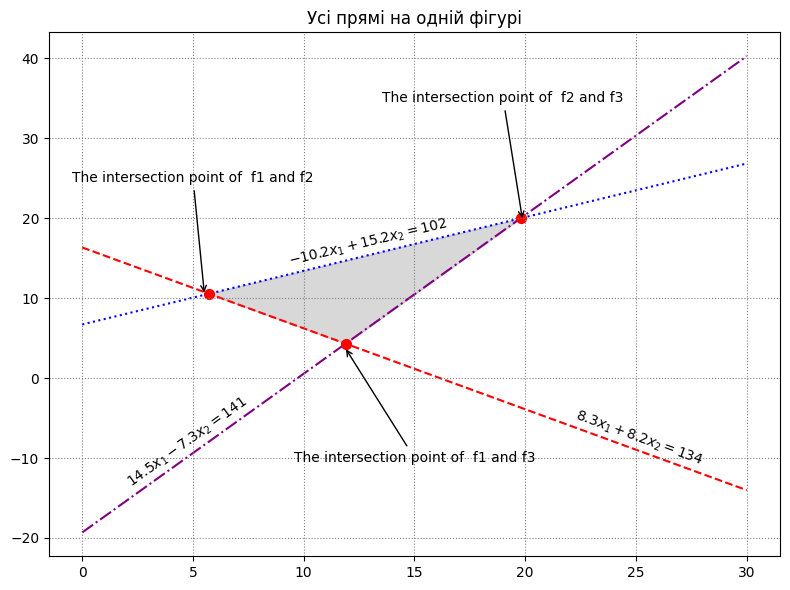

In [3]:

x = np.linspace(0, 30, 400)

y1 = line1(x)
y2 = line2(x)
y3 = line3(x)

fig = plt.figure(figsize=(8, 6), dpi=100)


plt.plot(x, y1, color="red", linestyle="dashed", label="$f_1$", zorder=0)
plt.plot(x, y2, color="blue", linestyle="dotted", label="$f_2$", zorder=0)
plt.plot(x, y3, color="purple", linestyle="dashdot", label="$f_3$", zorder=0)


plt.text(25, line1(25) + 0.5, "$8.3x_1 + 8.2x_2 = 134$", rotation=np.degrees(np.arctan(-8.3 / 8.2)), fontsize=10, 
         rotation_mode="anchor", transform_rotates_text=True, ha="center", va="bottom")
plt.text(13, line2(13) + 0.5, "$-10.2x_1 + 15.2x_2 = 102$", rotation=np.degrees(np.arctan(10.2 / 15.2)), fontsize=10, 
         rotation_mode="anchor", transform_rotates_text=True, ha="center", va="bottom")
plt.text(5, line3(5) + 0.5, "$14.5x_1 - 7.3x_2 = 141$", rotation=np.degrees(np.arctan(14.5 / 7.3)), fontsize=10, 
         rotation_mode="anchor", transform_rotates_text=True, ha="center", va="bottom")

intersection_points = np.ndarray((3, 2), dtype=np.float32)
intersection_points[0] = np.linalg.solve(([8.3, 8.2], [-10.2, 15.2]), (134, 102))
intersection_points[1] = np.linalg.solve(([-10.2, 15.2], [14.5, -7.3]), (102, 141))
intersection_points[2] = np.linalg.solve(([8.3, 8.2], [14.5, -7.3]), (134, 141))
plt.scatter(*zip(*intersection_points), color="red", s=50, zorder=1)

for i, point in enumerate(intersection_points, start=1):
    plt.text(point[0], point[1], "", fontsize=10, ha="right", va="bottom")
    
plt.fill_between(x, np.maximum.reduce([y1, y2, y3]), np.maximum(y1, y3), where=np.logical_and(x > intersection_points[0][0], x < intersection_points[1][0]), 
                 color="gray", alpha=0.3, zorder=-1)

plt.annotate("The intersection point of  f1 and f2", intersection_points[0] + (-0.2, -0.2), xytext=(5, 25), fontsize=10, ha="center", va="center", arrowprops={"arrowstyle": "->"})
plt.annotate("The intersection point of  f2 and f3", intersection_points[1] + (0.1, -0.35), xytext=(19, 35), fontsize=10, ha="center", va="center", arrowprops={"arrowstyle": "->"})
plt.annotate("The intersection point of  f1 and f3", intersection_points[2] + (-0.05, -0.4), xytext=(15, -10), fontsize=10, ha="center", va="center", arrowprops={"arrowstyle": "->"})


plt.title("Усі прямі на одній фігурі")
plt.grid(color="grey", linestyle="dotted")

# Відображення фігури
plt.tight_layout()
plt.savefig("2.jpg", bbox_inches="tight")
plt.savefig("2.png", bbox_inches="tight")
plt.savefig("2.svg", bbox_inches="tight")
plt.show()